<a href="https://colab.research.google.com/github/tronicey/Predictions-of-Product-Sales/blob/main/predictions_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictions of Product Sales
- Author: Tronice Ray

## Project Overview

## Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
#Save the file path and load the data as df_sales
fpath = ('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df_sales = pd.read_csv(fpath)
# Display the first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

1. How many rows and columns?

In [4]:
df_sales.shape

(8523, 12)

- There are 8523 rows and 12 columns

2. What are the data types of each variable?

In [5]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Information looks correct.

3. Are there any duplicates? If so, drop any duplicates.

In [6]:
# Check for duplicates
df_sales.duplicated().sum()

0

- There are 0 duplicates

4. Identify missing values.

In [7]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Missing Values
  - Item_Weight is missing 1463 values.
  - Outlet_Size is missing 2410 values.

5. Address the missing values by using a placeholder value.

In [8]:
# save list of categorical column name.
# Saving list of column names for numeric cols
num_cols = df_sales.select_dtypes('number').columns
# use the list of num columns to fill null values with -1
df_sales[num_cols]  = df_sales[num_cols].fillna(-1)
df_sales[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

- There are no longer any missing values in Item_Weight

In [9]:
# Saving list of column names for object cols
cat_cols = df_sales.select_dtypes('object').columns
# use the list of cat columns to fill null values with MISSING
# Using the list of cat_cols to fillna
df_sales[cat_cols] = df_sales[cat_cols].fillna("MISSING")


6. Confirm there are no missing values after addressing them

In [10]:
# Check for remaining missing values
df_sales.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- After addressing missing sales, there are no missing sales in the data frame.

7. Find and fix any inconsistent categories of data

In [11]:
# Remake the list of string columns
object_cols = df_sales.select_dtypes("object").columns
# loop through the list of string columns
for col in object_cols:
  # print the value counts for the column
  # Explore the value counts of one feature
   print(f"Value Counts for {col}")
   print(df_sales[col].value_counts())
  # Increasing readability by adding an empty line
print('\n')



Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035

- Inconsistencies were found in Item_Fat_Content
  - LF and low fat need to be added to Low Fat
  - Reg needs to be added to Regular

In [12]:
# Replace "LF" with "Low Fat"
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat"})
# Replace "low fat" with "Low Fat"
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'low fat':"Low Fat"})
# Check for inconsistencies by inspecting the value_counts for Item_Fat_Content
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [13]:
# Replace "reg" with "Regular"
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'reg':"Regular"})
# Check for inconsistencies by inspecting the value_counts for Item_Fat_Content
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- All inconsistencies have been removed from data frame

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [14]:
# Pull all numerical columns and round them at two decimal points.
df_sales.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [15]:
#Find the mean, smallest number and largest number for all number columns and round them to two decimal points.
stats =  df_sales.describe()
stats.loc[['mean','min','max']].round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,10.48,0.07,140.99,1997.83,2181.29
min,-1.00,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96


- The mean, min and max numbers were found for all number columns.
  - Item weight shows -1 for it's smallest number. It is assumed that is a filler for a missing number.
  - All other columns do not seem to have any issues.

## Exploratory Data Analysis

In [16]:
# Identify how many categories are in each categorical column
df_sales.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

Text(0, 0.5, 'Item Outlet Sales')

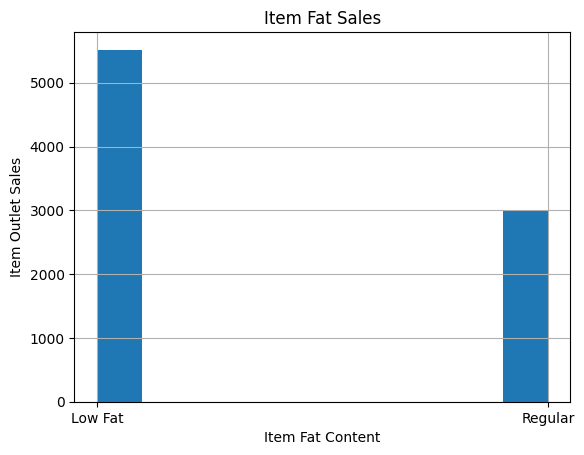

In [17]:
# Create histogram of item type sales
ax = df_sales['Item_Fat_Content'].hist()
ax.set_title('Item Fat Sales')
ax.set_xlabel('Item Fat Content')
ax.set_ylabel('Item Outlet Sales')

- This histogram shows more low fat items sold than regular fat items.

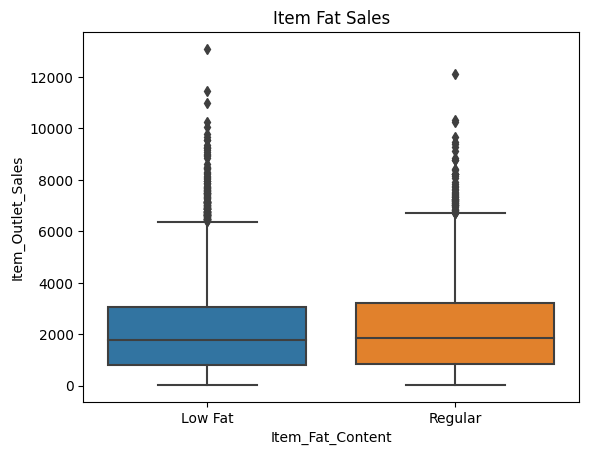

In [18]:
# Create a box plot of low fat and regular fat items and how they sold
ax = sns.boxplot(data=df_sales, x='Item_Fat_Content', y="Item_Outlet_Sales")
ax.set_title("Item Fat Sales");

- From this box plot we can see the averages sold of low fat and regular fat items are about the same, but overall low fat itmes sold more.

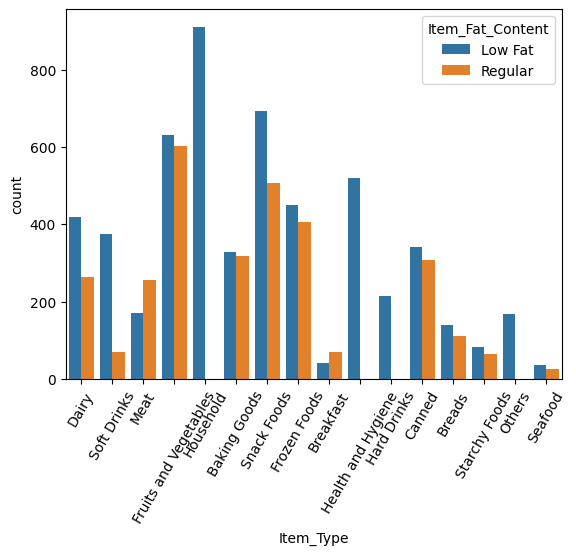

In [19]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df_sales, x='Item_Type', hue='Item_Fat_Content')
ax.tick_params(axis='x', rotation = 60)


- There are three item categories taht are only low fat, which may help understand why the low fat items sold more.

In [20]:
# Get correlations
corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


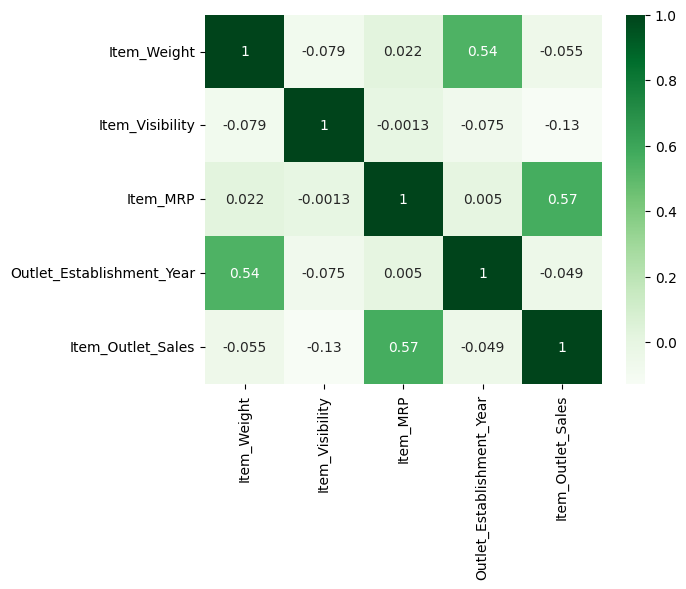

In [21]:
# Include annotations on the heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True);

## Feature Inspection




## Part 5

In [22]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [23]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Load file
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df = df.set_index("Item_Identifier")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Clean file

In [25]:
# 1. Check the data types and convert dtypes, if needed.
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [26]:
# Column for duplicate rows and address them, if needed.
df.duplicated().sum()

0

In [27]:
# Define a variable that contains the names of the object datatype columns
object_cols = df.select_dtypes('object').columns

In [28]:
## Loop through the index of object_data_types
for col in object_cols:
    # Display the unique values from the column
    print(f'for column {col}:')
    print(df[col].unique())
    print()

for column Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

for column Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

for column Outlet_Identifier:
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

for column Outlet_Size:
['Medium' nan 'High' 'Small']

for column Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

for column Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [29]:
# Use a Dictionary to replace values
df.replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)

In [30]:
# Display the value counts from the column
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
# Display desriptive statitistics for all collumns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [33]:
# Display desriptive statitistics for all collumns
df.describe(include='object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,2,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5517,1232,935,2793,3350,5577


In [34]:
# Display the sum of missing values
df.isna().sum().sum()

3873

In [35]:
# Display the sum of missing values
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
# Identify the features (X) and target (y):
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [38]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Save list of number column names

num_cols = X_train.select_dtypes("number").columns

print("Numeric Columns:", num_cols)

# Transformers
mean_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)
num_pipeline

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [39]:
# Tuple
numeric_tuple = ('numeric',num_pipeline, num_cols)

In [40]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA

# Save list of number column names
ordinal_cols = ['Outlet_Size', 'Outlet_Location_Type']

# Ordered Category Lists
Outlet_Size = ['Small', 'Medium', 'High']
Outlet_Location_Type = ['Tier 1', 'Tier 2', 'Tier 3']

# Transformers
ord = OrdinalEncoder(categories=[Outlet_Size, Outlet_Location_Type])
freq_imputer = SimpleImputer(strategy='most_frequent')

# you might have 100 diff cat for ordinal so its getting out of range so good to scale
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

In [41]:
# Tuple
ord_tuple = ('ordinal',ord_pipeline, ordinal_cols)

In [42]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA

# Save list of nominal column names
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns
# Transformers
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(missing_imputer , ohe)

# Tuple
ohe_tuple = ('categorical',nom_pipeline, nominal_cols)

In [43]:
nom_pipeline

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [44]:
# Instantiate the make column transformer
col_transformer = ColumnTransformer([numeric_tuple,
                                       ord_tuple,
                                       ohe_tuple],
                                       remainder='drop', verbose_feature_names_out=False)

In [45]:
# Fit the column transformer on the X_train
col_transformer.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  Ord...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [46]:
# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [47]:
# Transform the X_train and the X_test
X_train_proc = col_transformer.transform(X_train)
X_test_proc = col_transformer.transform(X_test)

In [48]:
# Display the first (5) rows of the dataframe
display(X_train_proc.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NCG06,0.827485,-0.712775,1.828109,1.327849,0.287374,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
FDV57,0.566644,-1.291052,0.603369,1.327849,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
FDM27,-0.121028,1.813319,0.244541,0.136187,0.287374,-1.384777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
FDG24,-1.158464,-1.004931,-0.952591,0.732018,-1.384048,-0.149914,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDD05,1.538870,-0.965484,-0.336460,0.493686,0.287374,-0.149914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
# Instantiate the preprocessor/ColumnTransformer
preprocessor = ColumnTransformer([numeric_tuple, ord_tuple,
                                       ohe_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  Ord...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [50]:
# Fit the preprocessor on training data
preprocessor.fit(X_train)
# Transform the training and test data
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NCG06,0.827485,-0.712775,1.828109,1.327849,0.287374,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
FDV57,0.566644,-1.291052,0.603369,1.327849,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
FDM27,-0.121028,1.813319,0.244541,0.136187,0.287374,-1.384777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
FDG24,-1.158464,-1.004931,-0.952591,0.732018,-1.384048,-0.149914,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDD05,1.538870,-0.965484,-0.336460,0.493686,0.287374,-0.149914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Part 6

## CRISP-DM Phase 4 - Modeling
### 1. Your first task is to build a linear regression model to predict sales.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [52]:
# Import and instantiate the model.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [53]:
# Fit the model on the training data
lin_reg.fit(X_train_proc, y_train)

LinearRegression()

In [54]:
# View the intercept determined during the fit step
lin_reg.intercept_.round(2)

3597265333378238.5

In [55]:
# View the coefficents determined during the fit step
lin_reg.coef_.round(2)


array([-7.36000000e+00, -2.17400000e+01,  9.84110000e+02,  1.46459242e+15,
        8.39557004e+14, -8.64896271e+14, -2.15701200e+14, -2.15701200e+14,
       -4.08971815e+13, -4.08971815e+13, -4.08971815e+13, -4.08971815e+13,
       -4.08971815e+13, -4.08971815e+13, -4.08971815e+13, -4.08971815e+13,
       -4.08971815e+13, -4.08971815e+13, -4.08971815e+13, -4.08971815e+13,
       -4.08971815e+13, -4.08971815e+13, -4.08971815e+13, -4.08971815e+13,
       -1.82543714e+15,  1.71002381e+15, -1.44534724e+15, -1.00222997e+15,
       -2.89350300e+14, -3.46719999e+14,  4.81496401e+14, -5.72697903e+14,
        6.35177733e+14, -1.11713604e+15, -8.43058065e+14, -3.86194451e+15,
       -3.58609377e+15, -5.28869243e+13])

In [56]:
# Get a list of the feature names after processing
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket

In [57]:
# Create a Pandas Series with feature name and coefficient
coeffs = pd.Series(lin_reg.coef_.round(2), index = feature_names)
coeffs

Item_Weight                       -7.360000e+00
Item_Visibility                   -2.174000e+01
Item_MRP                           9.841100e+02
Outlet_Establishment_Year          1.464592e+15
Outlet_Size                        8.395570e+14
Outlet_Location_Type              -8.648963e+14
Item_Fat_Content_Low Fat          -2.157012e+14
Item_Fat_Content_Regular          -2.157012e+14
Item_Type_Baking Goods            -4.089718e+13
Item_Type_Breads                  -4.089718e+13
Item_Type_Breakfast               -4.089718e+13
Item_Type_Canned                  -4.089718e+13
Item_Type_Dairy                   -4.089718e+13
Item_Type_Frozen Foods            -4.089718e+13
Item_Type_Fruits and Vegetables   -4.089718e+13
Item_Type_Hard Drinks             -4.089718e+13
Item_Type_Health and Hygiene      -4.089718e+13
Item_Type_Household               -4.089718e+13
Item_Type_Meat                    -4.089718e+13
Item_Type_Others                  -4.089718e+13
Item_Type_Seafood                 -4.089

In [58]:
# Get predictions for the training data
y_predictions_train = lin_reg.predict(X_train_tf)
# Get predictions for the testing data
y_predictions_test = lin_reg.predict(X_test_tf)

In [59]:
# Saving a copy of X_test_tf and adding the true and predicted price and the error
prediction_df = X_test_tf.copy()
prediction_df['Item_Outlet_Sales'] = y_test
prediction_df['Predicted Item_Outlet_Sales'] = y_predictions_test.round(1)
prediction_df['Error'] = (y_predictions_test - y_test).round(1)
prediction_df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales,Predicted Item_Outlet_Sales,Error
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDI28,0.341372,-0.776646,-0.998816,-1.293807,1.958796,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1743.0644,1361.5,-381.6
NCM17,-1.169135,0.100317,-1.585194,-0.102145,-1.384048,-1.384777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,356.8688,717.5,360.6
FDC14,0.388798,-0.482994,-1.595784,0.136187,0.287374,-1.384777,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,377.5086,884.5,507.0
DRC36,-0.049889,-0.415440,0.506592,-1.532139,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5778.4782,4237.5,-1541.0
FDS27,-0.632039,-1.047426,0.886725,0.732018,-1.384048,-0.149914,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2356.9320,3340.5,983.6
DRK12,-0.796844,-0.470511,-1.748367,0.136187,0.287374,-1.384777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,865.5400,612.5,-253.0
FDO25,-0.049889,1.189692,1.070615,-1.532139,0.287374,1.084948,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4613.9940,4762.5,148.5
FDB58,-0.559715,-1.025995,0.000559,1.327849,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2410.8618,2067.5,-343.4
FDY48,0.270234,-0.824923,-0.620321,1.327849,0.287374,1.084948,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1948.1308,1405.0,-543.1


Use the custom evaluation function to get the metrics for your model (on training and test data).

In [60]:
from sklearn.ensemble import BaggingRegressor

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Instantiate a Default Model
bagreg = BaggingRegressor(random_state = 42)
# Model Pipeline with default preprocessor and default model
bagreg_pipe = make_pipeline(preprocessor, bagreg)
# Fit the model pipeline on the training data only
bagreg_pipe.fit(X_train, y_train)
# Call custom function for evaluation
evaluate_regression(bagreg_pipe, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 317.903
- MSE = 236,931.940
- RMSE = 486.757
- R^2 = 0.920

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 780.431
- MSE = 1,283,723.305
- RMSE = 1,133.015
- R^2 = 0.535


In [63]:
# Define parameters to tune
param_grid = {'baggingregressor__n_estimators': [5, 10, 20, 30, 40, 50],
              'baggingregressor__max_samples' : [.5, .7, .9, ],
              'baggingregressor__max_features': [.5, .7, .9 ]}
# Instaniate the gridsearch
gridsearch = GridSearchCV(bagreg_pipe, param_grid, n_jobs=-1, verbose=1)
# Fit the gridsearch on the training data
gridsearch.fit(X_train, y_train)
# Obtain the best paramters from the gridsearch
gridsearch.best_params_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'baggingregressor__max_features': 0.9,
 'baggingregressor__max_samples': 0.5,
 'baggingregressor__n_estimators': 50}

In [64]:
# Define a model with the best parameters already refit on the entire training set
best_bagreg_grid = gridsearch.best_estimator_
# Evalute the tuned model
evaluate_regression(best_bagreg_grid, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 490.325
- MSE = 488,021.801
- RMSE = 698.586
- R^2 = 0.835

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 764.637
- MSE = 1,181,310.204
- RMSE = 1,086.881
- R^2 = 0.572


- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
  - The training data tested better than the test data under R^2.

### 2. Your second task is to build a Random Forest model to predict sales.

- Build a default Random Forest model.

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [67]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='m...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

- Use the custom evaluation function to get the metrics for your model (on training and test data).

In [68]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.473
- MSE = 182,503.660
- RMSE = 427.204
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.140
- MSE = 1,218,088.531
- RMSE = 1,103.670
- R^2 = 0.558


- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
  - Again, the training data tested better than the test data.

- Compare this model's performance to the linear regression model: which model has the best test scores?
 - The Random Forest Test Data had the best scores.

### 3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [71]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='m...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [72]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.473
- MSE = 182,503.660
- RMSE = 427.204
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.140
- MSE = 1,218,088.531
- RMSE = 1,103.670
- R^2 = 0.558


In [73]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     Ord...
                                                     StandardScaler())]),
                           

In [74]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],}

- After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).

In [75]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 2, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimpute...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [76]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__oob_score': True}

In [77]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 660.784
- MSE = 889,298.462
- RMSE = 943.026
- R^2 = 0.700

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 734.692
- MSE = 1,113,348.722
- RMSE = 1,055.153
- R^2 = 0.596


- Compare your tuned model to your default Random Forest: did the performance improve?
 - Yes, it did

## CRISP-DM Phase 5 - Evaluation

### 4. You now have tried several different models on your data set. You need to determine which model to implement.

- Overall, which model do you recommend?
 - The Random Forest tuned model, but there is no great model of those available.

- Justify your recommendation.
  - The Random Forest tuned model has the closest corresponding metrics between the training and testing data, however the test data R^2 metric is fairly low.

- Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
  - The R^2 in the Random Forest tuned model is showing a fairly low correlation between the variants and the target.

- Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
  - MAE

- Include why you selected this metric to explain to your stakeholder.
  - The MAE metric in the Random Forest tuned model is showing to be 735 dollars off.